In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

## Voxel-based results

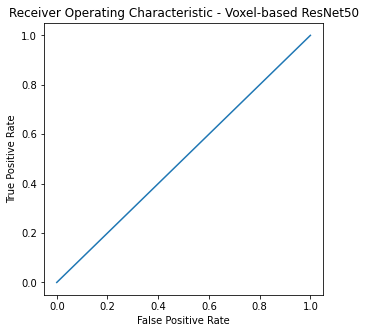

Voxel-based ResNet50: Test Accuracy = 0.5
Voxel-based ResNet50: Test AUC = 0.5
Voxel-based ResNet50: Test Sensitivity = 0.0
Voxel-based ResNet50: Test Specificity = 1.0
 
Incorrect Predictions:
                   type  actual  pred
scan_id                              
OAS30223_MR_d0455  test       1   0.0
OAS30305_MR_d0245  test       1   0.0
OAS30565_MR_d3127  test       1   0.0
OAS30848_MR_d0070  test       1   0.0
OAS30899_MR_d0070  test       1   0.0
OAS30903_MR_d0046  test       1   0.0
OAS30929_MR_d0115  test       1   0.0
OAS31000_MR_d0072  test       1   0.0
OAS31150_MR_d0073  test       1   0.0
OAS31162_MR_d0107  test       1   0.0


In [2]:
df = pd.read_csv('Results/results_ResNet50_Voxel.csv')

df_test = df[df['type']=='test']
y_test =  df_test.actual
test_prob = df_test.pred
test_pred = test_prob.round()

cm = confusion_matrix(y_test, test_pred)
tn, fp, fn, tp = cm.ravel()
# sensitivity (true positive rate (recall))
test_sens = tp/(tp+fn)
# specifity (true negative rate)
test_spec = tn/(tn+fp)   

fpr, tpr, threshold = roc_curve(y_test, test_prob)

plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic - Voxel-based ResNet50')
plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

vox_dsp = plt

test_acc = 0.5
test_auroc = roc_auc_score(y_test, test_pred)

print("Voxel-based ResNet50: Test Accuracy = " + str(test_acc))
print("Voxel-based ResNet50: Test AUC = " + str(test_auroc))
print("Voxel-based ResNet50: Test Sensitivity = " + str(test_sens))
print("Voxel-based ResNet50: Test Specificity = " + str(test_spec))

print(' ')
df_results = df_test.copy()
df_results = df_results[['type', 'scan_id', 'actual']]
df_results['pred'] = test_pred.round()
df_results =df_results.set_index('scan_id')
print('Incorrect Predictions:')
print(df_results[df_results['actual']!=df_results['pred']])

## Patch-based methods

In [3]:
def model_eval(model_name, model_dir):
    df = pd.read_csv(model_dir)
    df = df.pivot(index=["type", "scan_id", "actual"], columns=["patch"], values="pred")
    df = df.reset_index()

    df_train = df[df['type']=='train']
    df_train = df_train.append(df[df['type']=='val'])
    x_train = df_train[df_train.columns[3:]]
    y_train = df_train['actual']

    df_test = df[df['type']=='test']
    x_test = df_test[df_test.columns[3:]]
    y_test = df_test['actual']

    model = LogisticRegression(random_state=0)
    model.fit(x_train, y_train)

    train_preds = model.predict_proba(x_train)[:,1]
    train_acc = model.score(x_train, y_train)
    train_auroc = roc_auc_score(y_train, train_preds)

    test_preds = model.predict_proba(x_test)[:,1]
    test_acc = model.score(x_test, y_test)
    test_auroc = roc_auc_score(y_test, test_preds)

    false_positive_rate, true_positive_rate, threshold1 = roc_curve(y_test, test_preds)

    plt.subplots(1, figsize=(5,5))
    plt.title('Receiver Operating Characteristic - '+model_name)
    plt.plot(false_positive_rate, true_positive_rate)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()


    cm = confusion_matrix(y_test, model.predict(x_test))
    tn, fp, fn, tp = cm.ravel()
    # sensitivity (true positive rate (recall))
    test_sens = tp/(tp+fn)
    # specifity (true negative rate)
    test_spec = tn/(tn+fp)   
    
    plot_confusion_matrix(model, x_test, y_test)  
    plt.title('Confusion matrix - '+model_name)
    plt.show()
    
#     print(model_name + ": Train accuracy = " + str(train_acc))
#     print(model_name + ": Train AUC = " + str(train_auroc))
    print(model_name + ": Test Accuracy = " + str(test_acc))
    print(model_name + ": Test AUC = " + str(test_auroc))
    print(model_name + ": Test Sensitivity = " + str(test_sens))
    print(model_name + ": Test Specificity = " + str(test_spec))
    print(' ')
    df_results = df_test.copy()
    df_results = df_results[['type', 'scan_id', 'actual']]
    df_results['pred'] = test_preds.round()
    df_results =df_results.set_index('scan_id')
    print('Incorrect Predictions:')
    print(df_results[df_results['actual']!=df_results['pred']])

### DenseNet121

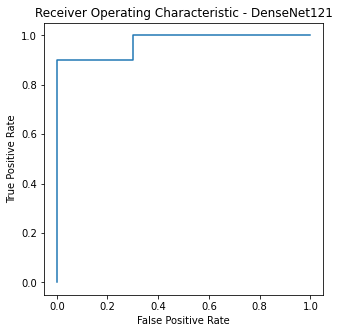

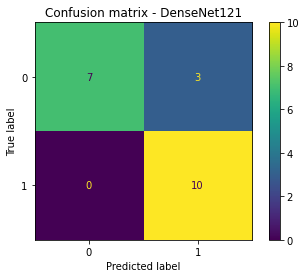

DenseNet121: Test Accuracy = 0.85
DenseNet121: Test AUC = 0.97
DenseNet121: Test Sensitivity = 1.0
DenseNet121: Test Specificity = 0.7
 
Incorrect Predictions:
patch              type  actual  pred
scan_id                              
OAS30407_MR_d0061  test       0   1.0
OAS30876_MR_d0126  test       0   1.0
OAS31145_MR_d0483  test       0   1.0


In [4]:
model_eval(model_name='DenseNet121', model_dir='Results/results_DenseNet121.csv')

### ResNet18

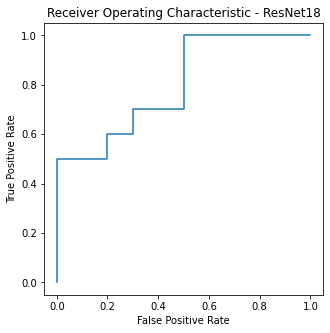

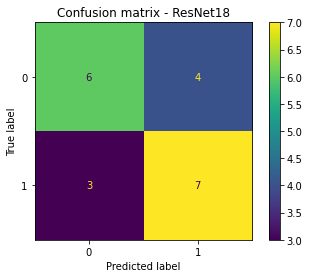

ResNet18: Test Accuracy = 0.65
ResNet18: Test AUC = 0.7999999999999999
ResNet18: Test Sensitivity = 0.7
ResNet18: Test Specificity = 0.6
 
Incorrect Predictions:
patch              type  actual  pred
scan_id                              
OAS30407_MR_d0061  test       0   1.0
OAS30652_MR_d0778  test       0   1.0
OAS30876_MR_d0126  test       0   1.0
OAS30903_MR_d0046  test       1   0.0
OAS31000_MR_d0072  test       1   0.0
OAS31145_MR_d0483  test       0   1.0
OAS31150_MR_d0073  test       1   0.0


In [5]:
model_eval(model_name='ResNet18', model_dir='Results/results_ResNet18.csv')

### ResNet50

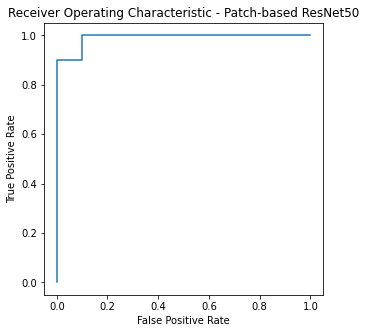

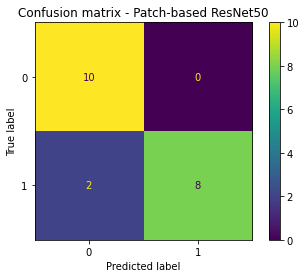

Patch-based ResNet50: Test Accuracy = 0.9
Patch-based ResNet50: Test AUC = 0.99
Patch-based ResNet50: Test Sensitivity = 0.8
Patch-based ResNet50: Test Specificity = 1.0
 
Incorrect Predictions:
patch              type  actual  pred
scan_id                              
OAS30899_MR_d0070  test       1   0.0
OAS30929_MR_d0115  test       1   0.0


In [6]:
model_eval(model_name='Patch-based ResNet50', model_dir='Results/results_ResNet50.csv')

### SEResNet50

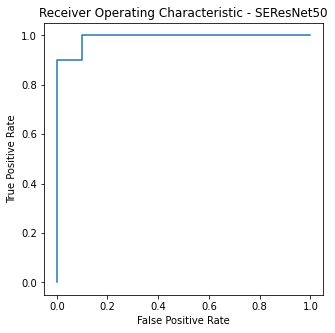

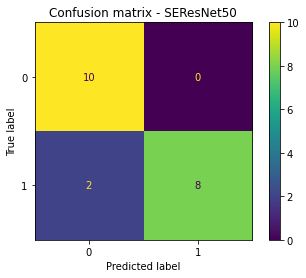

SEResNet50: Test Accuracy = 0.9
SEResNet50: Test AUC = 0.99
SEResNet50: Test Sensitivity = 0.8
SEResNet50: Test Specificity = 1.0
 
Incorrect Predictions:
patch              type  actual  pred
scan_id                              
OAS30899_MR_d0070  test       1   0.0
OAS30929_MR_d0115  test       1   0.0


In [7]:
model_eval(model_name='SEResNet50', model_dir='Results/results_ResNet50.csv')

### SEResNeXt50

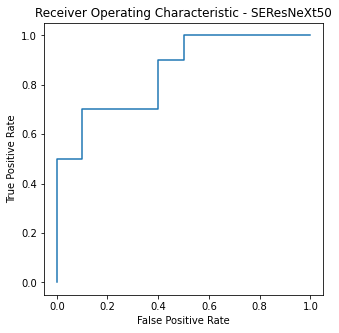

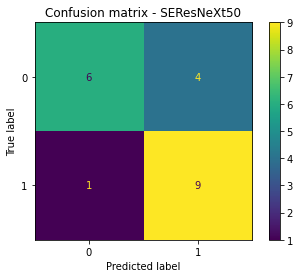

SEResNeXt50: Test Accuracy = 0.75
SEResNeXt50: Test AUC = 0.85
SEResNeXt50: Test Sensitivity = 0.9
SEResNeXt50: Test Specificity = 0.6
 
Incorrect Predictions:
patch              type  actual  pred
scan_id                              
OAS30407_MR_d0061  test       0   1.0
OAS30571_MR_d0120  test       0   1.0
OAS30652_MR_d0778  test       0   1.0
OAS30899_MR_d0070  test       1   0.0
OAS31145_MR_d0483  test       0   1.0


In [8]:
model_eval(model_name='SEResNeXt50', model_dir='Results/results_SEResNeXt50.csv')

## Ensemble

In [9]:
df1 = pd.read_csv('Results/results_ResNet50.csv')
df1 = df1.pivot(index=["type", "scan_id", "actual"], columns=["patch"], values="pred")
df1 = df1.reset_index()

df2 = pd.read_csv('Results/results_SEResNet50.csv')
df2 = df2.pivot(index=["type", "scan_id", "actual"], columns=["patch"], values="pred")
df2 = df2.reset_index()
df2 = df2[df2.columns[3:]]


df3 = pd.read_csv('Results/results_SEResNeXt50.csv')
df3 = df3.pivot(index=["type", "scan_id", "actual"], columns=["patch"], values="pred")
df3 = df3.reset_index()
df3 = df3[df3.columns[3:]]

df4 = pd.read_csv('Results/results_ResNet18.csv')
df4 = df4.pivot(index=["type", "scan_id", "actual"], columns=["patch"], values="pred")
df4 = df4.reset_index()
df4 = df4[df4.columns[3:]]

df5 = pd.read_csv('Results/results_DenseNet121.csv')
df5 = df5.pivot(index=["type", "scan_id", "actual"], columns=["patch"], values="pred")
df5 = df5.reset_index()
df5 = df5[df5.columns[3:]]

df = df1.join(df2, rsuffix=' - SEResNet50')
df = df.join(df3, rsuffix=' - SEResNeXt50')
df = df.join(df4, rsuffix=' - ResNet18')
df = df.join(df5, rsuffix=' - DenseNet121')

C:\Users\Justin\.conda\envs\tf-gpu\lib\site-packages\pandas\core\frame.py:9126: FutureWarning: Passing 'suffixes' which cause duplicate columns {'7', '26', '11', '25', '13', '21', '20', '10', '8', '16', '18', '19', '0', '5', '15', '12', '17', '24', '22', '4', '23', '3', '6', '1', '9', '2', '14'} in the result is deprecated and will raise a MergeError in a future version.
  return merge(


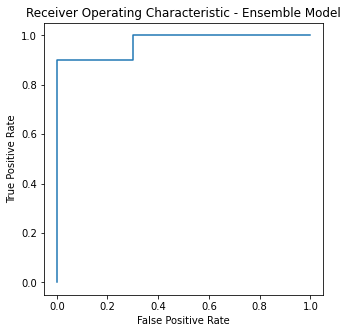

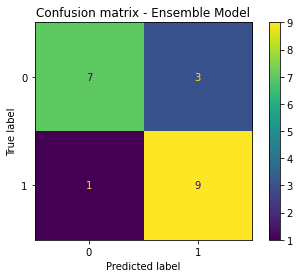

Ensemble Model: Test Accuracy = 0.8
Ensemble Model: Test AUC = 0.97
Ensemble Model: Test Sensitivity = 0.9
Ensemble Model: Test Specificity = 0.7
 
Incorrect Predictions:
patch              type  actual  pred
scan_id                              
OAS30407_MR_d0061  test       0   1.0
OAS30652_MR_d0778  test       0   1.0
OAS31000_MR_d0072  test       1   0.0
OAS31145_MR_d0483  test       0   1.0


In [10]:
df_train = df[df['type']=='train']
df_train = df_train.append(df[df['type']=='val'])
x_train = df_train[df_train.columns[3:]]
y_train = df_train['actual']

df_test = df[df['type']=='test']
x_test = df_test[df_test.columns[3:]]
y_test = df_test['actual']

model = LogisticRegression(random_state=0)
model.fit(x_train, y_train)

train_preds = model.predict_proba(x_train)[:,1]
train_acc = model.score(x_train, y_train)
train_auroc = roc_auc_score(y_train, train_preds)

test_preds = model.predict_proba(x_test)[:,1]
test_acc = model.score(x_test, y_test)
test_auroc = roc_auc_score(y_test, test_preds)

false_positive_rate, true_positive_rate, threshold1 = roc_curve(y_test, test_preds)

plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic - Ensemble Model')
plt.plot(false_positive_rate, true_positive_rate)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


cm = confusion_matrix(y_test, model.predict(x_test))
tn, fp, fn, tp = cm.ravel()
# sensitivity (true positive rate (recall))
test_sens = tp/(tp+fn)
# specifity (true negative rate)
test_spec = tn/(tn+fp)   

plot_confusion_matrix(model, x_test, y_test)  
plt.title('Confusion matrix - Ensemble Model')
plt.show()

#     print(model_name + ": Train accuracy = " + str(train_acc))
#     print(model_name + ": Train AUC = " + str(train_auroc))
print("Ensemble Model: Test Accuracy = " + str(test_acc))
print("Ensemble Model: Test AUC = " + str(test_auroc))
print("Ensemble Model: Test Sensitivity = " + str(test_sens))
print("Ensemble Model: Test Specificity = " + str(test_spec))

print(' ')
df_results = df_test.copy()
df_results = df_results[['type', 'scan_id', 'actual']]
df_results['pred'] = test_preds.round()
df_results =df_results.set_index('scan_id')
print('Incorrect Predictions:')
print(df_results[df_results['actual']!=df_results['pred']])